In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data, parse dates, and check for NaT values
df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Warn for NaT values
if df['InvoiceDate'].isnull().any():
    print("Warning: Some dates could not be parsed. Check the following rows:")
    display(df[df['InvoiceDate'].isnull()])

df.set_index('InvoiceDate', inplace=True)
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

print("Data Loaded and Preprocessed!")


Data Loaded and Preprocessed!


In [2]:
print("Descriptive Statistics:")
display(df.describe())

# Top 10 Customers by Total Spend
top_customers = df.groupby('CustomerID')['TotalSpend'].sum().reset_index().sort_values(by='TotalSpend', ascending=False).head(10)
print("\nTop 10 Customers by Total Spend:")
display(top_customers)


Descriptive Statistics:


,Quantity,UnitPrice,CustomerID,TotalSpend
count,536641.000000,536641.000000,401604.000000,536641.000000
mean,9.620029,4.632656,15281.160818,18.123861
std,219.130156,97.233118,1714.006089,380.656263
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13939.000000,3.750000
50%,3.000000,2.080000,15145.000000,9.870000
75%,10.000000,4.130000,16784.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000



Top 10 Customers by Total Spend:


,CustomerID,TotalSpend
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187322.17
1895,14911.0,132458.73
55,12415.0,123725.45
1345,14156.0,113214.59
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62690.54
2192,15311.0,59284.19


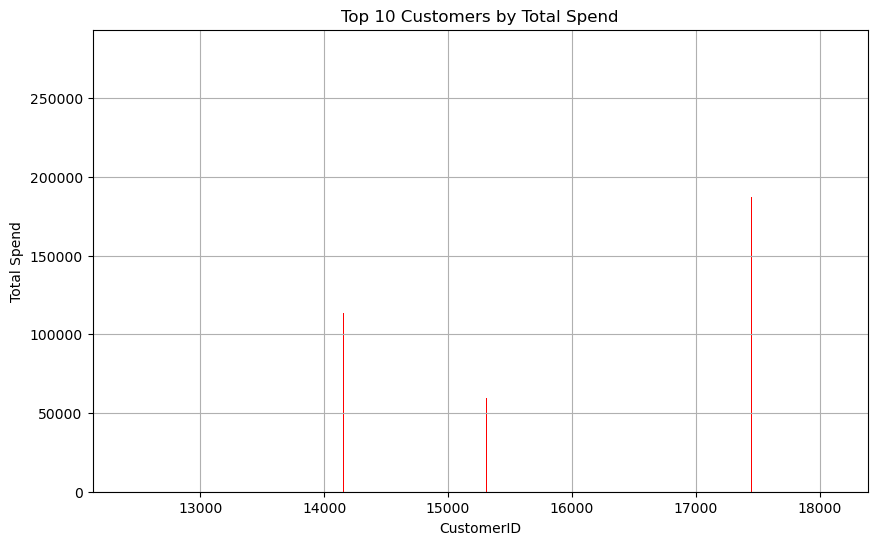

In [3]:
# Plot Top 10 Customers by Total Spend
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'], top_customers['TotalSpend'], color='red')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('CustomerID')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()


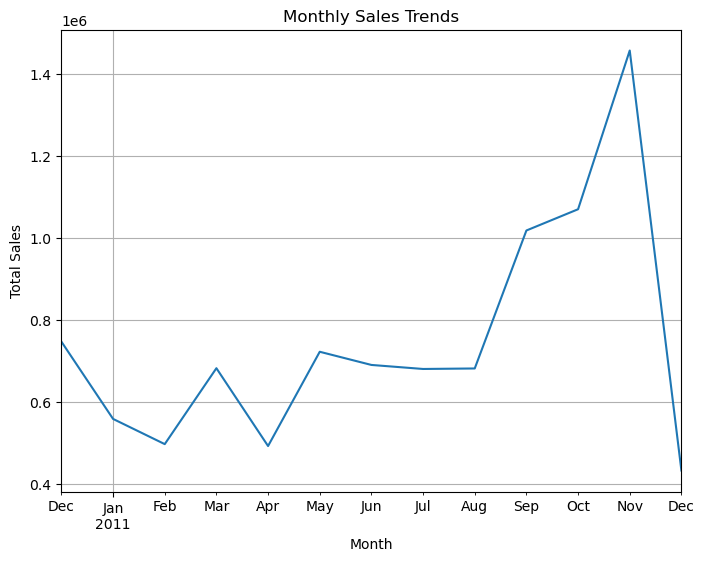

In [5]:
# Monthly Sales Trends
monthly_sales = df.resample('M').sum()['TotalSpend']
plt.figure(figsize=(8, 6))
monthly_sales.plot(title='Monthly Sales Trends', xlabel='Month', ylabel='Total Sales')
plt.grid(True)
plt.show()


In [5]:
import os
print(os.getcwd())  # Prints the current working directory



C:\Users\sshri\Desktop\Customer


In [7]:
import pandas as pd  # Importing the pandas library

# Load your data into a DataFrame
df = pd.read_csv('cleaned_data.csv')  # Use the correct path format for your OS

# Check the DataFrame's columns and first few rows
print("Columns in DataFrame:", df.columns)
print(df.head())

# If necessary, strip any whitespace from column names
df.columns = df.columns.str.strip()

# Calculate Total Spending
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# 4. **Country-wise Analysis**
country_sales = df.groupby('Country')['TotalSpend'].sum().reset_index()
country_sales = country_sales.sort_values(by='TotalSpend', ascending=False)

# Display the top 10 countries by total spending
print("\nTotal Sales by Country:")
print(country_sales.head(10))  # Show top 10 countries by sales


Columns in DataFrame: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  united kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  united kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  united kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  united kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  united kingdom  

Total Sales by Co

Columns in DataFrame: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  united kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  united kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  united kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  united kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  united kingdom  


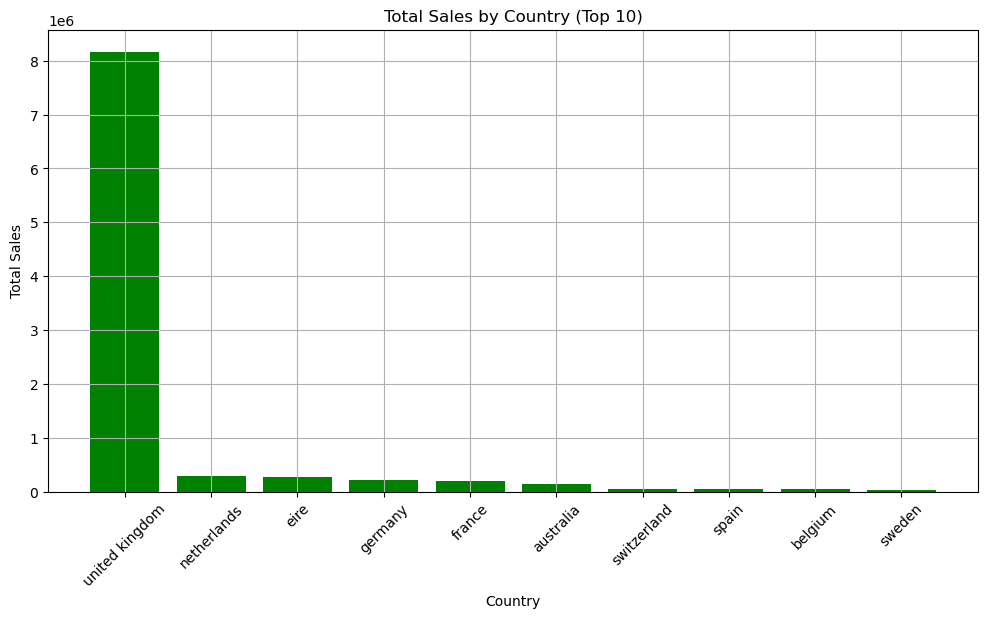

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Load your data into a DataFrame
df = pd.read_csv('cleaned_data.csv')  # Use the correct path format for your OS

# Check the DataFrame's columns and first few rows
print("Columns in DataFrame:", df.columns)
print(df.head())

# If necessary, strip any whitespace from column names
df.columns = df.columns.str.strip()

# Calculate Total Spending
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# 4. **Country-wise Analysis**
country_sales = df.groupby('Country')['TotalSpend'].sum().reset_index()
country_sales = country_sales.sort_values(by='TotalSpend', ascending=False)

# Plot Sales by Country (Top 10 Countries)
plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'].head(10), country_sales['TotalSpend'].head(10), color='green')
plt.title('Total Sales by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [9]:
# 5. **Top Products Analysis**
top_products = df.groupby('Description')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
display(top_products)



Top 10 Products by Quantity Sold:


,Description,Quantity
4010,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
1866,JUMBO BAG RED RETROSPOT,47260
2740,POPCORN HOLDER,36322
244,ASSORTED COLOUR BIRD ORNAMENT,36282
2395,PACK OF 72 RETROSPOT CAKE CASES,36016
3919,WHITE HANGING HEART T-LIGHT HOLDER,35298
2803,RABBIT NIGHT LIGHT,30631
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26299
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24719


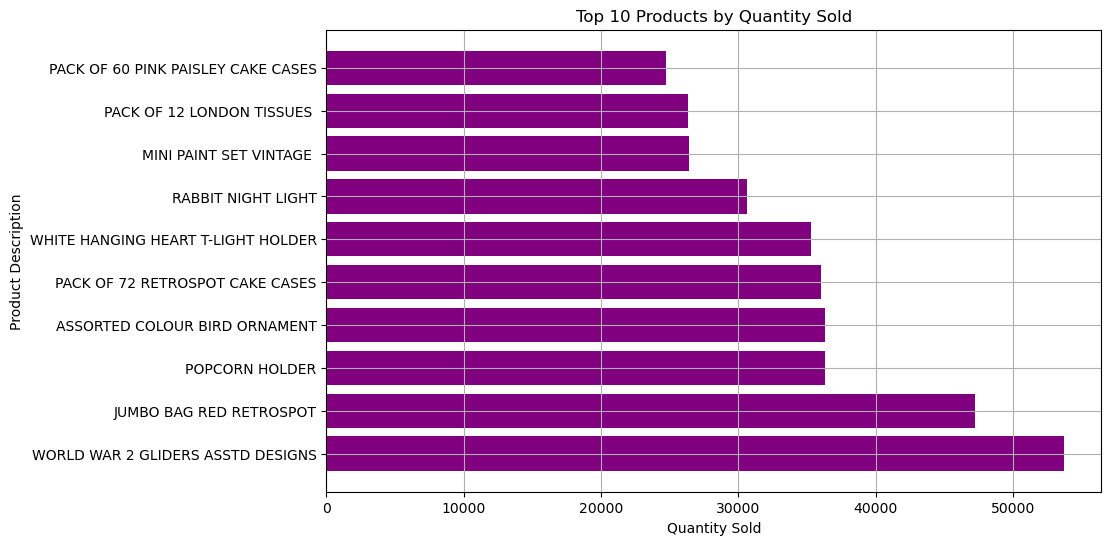

In [10]:
# Plot Top 10 Products by Quantity Sold
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Quantity'], color='purple')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.grid(True)
plt.show()


In [11]:
# 6. **Customer Retention Analysis**
total_customers = df['CustomerID'].nunique()
returning_customers = df['CustomerID'].value_counts()[df['CustomerID'].value_counts() > 1].count()
print(f"\nTotal Customers: {total_customers}")
print(f"Returning Customers: {returning_customers}")
print(f"Percentage of Returning Customers: {returning_customers / total_customers * 100:.2f}%")



Total Customers: 4372
Returning Customers: 4293
Percentage of Returning Customers: 98.19%


In [12]:
# 7. **RFM (Recency, Frequency, Monetary) Analysis**
# First, ensure the 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

df_reset = df.reset_index()

rfm_df = df_reset.groupby('CustomerID').agg({
    'InvoiceNo': 'count',  
    'TotalSpend': 'sum',  
    'InvoiceDate': lambda x: (df_reset['InvoiceDate'].max() - x.max()).days  # Recency: days since last purchase
}).reset_index()

rfm_df.columns = ['CustomerID', 'Frequency', 'Monetary', 'Recency']

print("\nRFM Analysis (Top 10 Customers):")
print(rfm_df.head(10)) 



RFM Analysis (Top 10 Customers):
   CustomerID  Frequency  Monetary  Recency
0     12346.0          2      0.00      325
1     12347.0        182   4310.00        1
2     12348.0         31   1797.24       74
3     12349.0         73   1757.55       18
4     12350.0         17    334.40      309
5     12352.0         95   1545.41       35
6     12353.0          4     89.00      203
7     12354.0         58   1079.40      231
8     12355.0         13    459.40      213
9     12356.0         59   2811.43       22


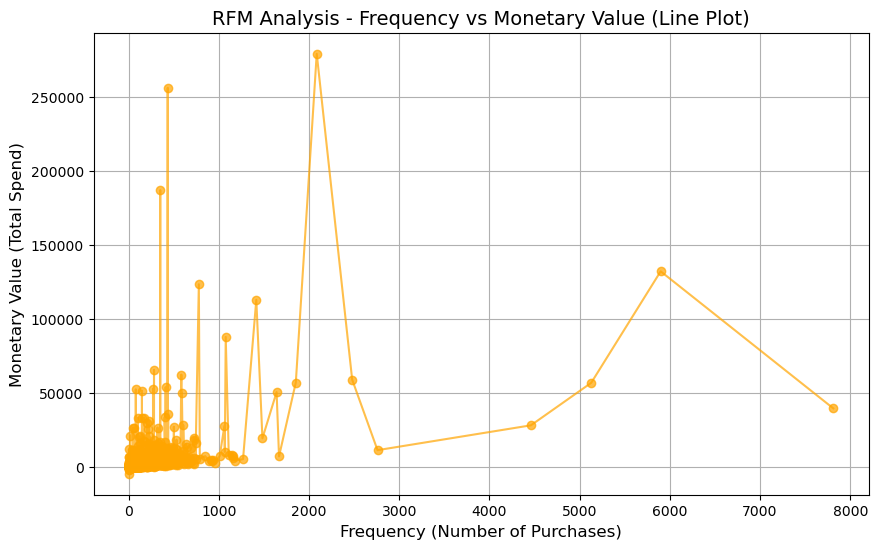

In [13]:
# Sort the data by Frequency for proper line plotting
rfm_df_sorted = rfm_df.sort_values(by='Frequency')

# Plot RFM - Frequency vs Monetary as a line graph
plt.figure(figsize=(10, 6))

# Plot line graph
plt.plot(rfm_df_sorted['Frequency'], rfm_df_sorted['Monetary'], color='orange', marker='o', linestyle='-', alpha=0.7)

# Add title and labels
plt.title('RFM Analysis - Frequency vs Monetary Value (Line Plot)', fontsize=14)
plt.xlabel('Frequency (Number of Purchases)', fontsize=12)
plt.ylabel('Monetary Value (Total Spend)', fontsize=12)

# Add grid for readability
plt.grid(True)

# Show the plot
plt.show()


In [14]:
# Assume average margin and purchase frequency
average_order_value = df['TotalSpend'].mean()
average_purchase_frequency = df['InvoiceNo'].nunique() / df['CustomerID'].nunique()

# Calculate CLV
clv = average_order_value * average_purchase_frequency * (1 / (1 - 0.1))  # Assuming a 10% churn rate
print(f"Estimated Customer Lifetime Value (CLV): {clv:.2f}")


Estimated Customer Lifetime Value (CLV): 119.30


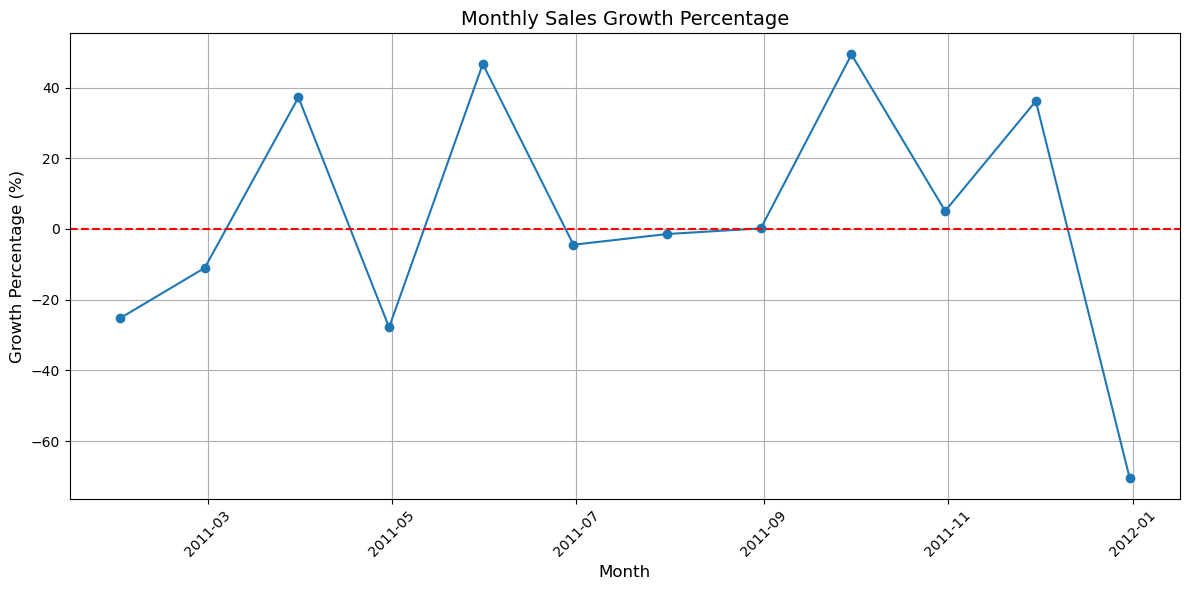

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv') 

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']


monthly_sales = df.resample('M').sum()['TotalSpend']
monthly_growth = monthly_sales.pct_change() * 100 

plt.figure(figsize=(12, 6))
plt.plot(monthly_growth, marker='o', linestyle='-')
plt.title('Monthly Sales Growth Percentage', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Growth Percentage (%)', fontsize=12)
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')  
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


In [16]:
# Assuming you have a way to determine if a customer is active or not
total_customers = df['CustomerID'].nunique()
churned_customers = total_customers - df['CustomerID'].nunique()  # Adjust logic as needed
churn_rate = (churned_customers / total_customers) * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 0.00%


In [17]:
# Top and Bottom Products
product_performance = df.groupby('Description').agg({'TotalSpend': 'sum', 'Quantity': 'sum'}).reset_index()
top_products = product_performance.sort_values(by='TotalSpend', ascending=False).head(10)
bottom_products = product_performance.sort_values(by='TotalSpend').head(10)

print("Top Products:\n", top_products)
print("Bottom Products:\n", bottom_products)


Top Products:
                              Description  TotalSpend  Quantity
1098                      DOTCOM POSTAGE   206245.48       707
2915            REGENCY CAKESTAND 3 TIER   164459.49     13007
3919  WHITE HANGING HEART T-LIGHT HOLDER    99612.42     35298
2471                       PARTY BUNTING    98243.88     18010
1866             JUMBO BAG RED RETROSPOT    92175.79     47260
2803                  RABBIT NIGHT LIGHT    66661.63     30631
2753                             POSTAGE    66230.64      3003
2439     PAPER CHAIN KIT 50'S CHRISTMAS     63715.24     18876
244        ASSORTED COLOUR BIRD ORNAMENT    58792.42     36282
773                        CHILLI LIGHTS    53746.66     10225
Bottom Products:
                          Description  TotalSpend  Quantity
171                       AMAZON FEE -221520.500       -30
2246                          Manual  -69031.640      2925
281                  Adjust bad debt  -11062.060         3
934                  CRUK Commission  

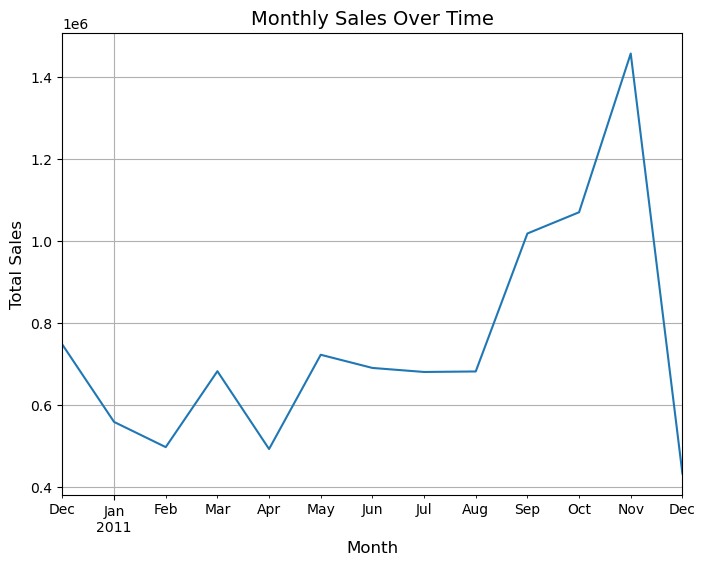

In [18]:
# Monthly sales totals
monthly_sales = df.resample('M').sum()['TotalSpend']

# Plotting Monthly Sales to identify seasonality
plt.figure(figsize=(8, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.show()


In [19]:
# 1. Overall Sales Performance
total_sales = df['TotalSpend'].sum()
total_transactions = df['InvoiceNo'].nunique()
total_unique_customers = df['CustomerID'].nunique()

# Print Overall Sales Performance
print("\n--- Overall Sales Performance ---")
print(f"   - Total Sales: ${total_sales:.2f}")
print(f"   - Total Transactions: {total_transactions}")
print(f"   - Total Unique Customers: {total_unique_customers}")



--- Overall Sales Performance ---
   - Total Sales: $9726006.95
   - Total Transactions: 25900
   - Total Unique Customers: 4372


In [20]:
# 2. Top 10 Customers
top_customers = df.groupby('CustomerID')['TotalSpend'].sum().reset_index()
top_customers = top_customers.sort_values(by='TotalSpend', ascending=False).head(10)
top_customers_summary = top_customers.set_index('CustomerID')['TotalSpend'].to_dict()

# Print Top 10 Customers
print("\n2. Top 10 Customers by Total Spend:")
for customer, spend in top_customers_summary.items():
    print(f"   - Customer ID {customer}: ${spend:.2f}")



2. Top 10 Customers by Total Spend:
   - Customer ID 14646.0: $279489.02
   - Customer ID 18102.0: $256438.49
   - Customer ID 17450.0: $187322.17
   - Customer ID 14911.0: $132458.73
   - Customer ID 12415.0: $123725.45
   - Customer ID 14156.0: $113214.59
   - Customer ID 17511.0: $88125.38
   - Customer ID 16684.0: $65892.08
   - Customer ID 13694.0: $62690.54
   - Customer ID 15311.0: $59284.19


In [21]:
# 3. Monthly Sales Trends
monthly_sales = df.resample('M').sum()['TotalSpend']
monthly_sales_summary = monthly_sales.describe()

# Print Monthly Sales Trends
print("\n3. Monthly Sales Trends:")
print(monthly_sales_summary)



3. Monthly Sales Trends:
count    1.300000e+01
mean     7.481544e+05
std      2.826279e+05
min      4.327011e+05
25%      5.584486e+05
50%      6.820140e+05
75%      7.467236e+05
max      1.456146e+06
Name: TotalSpend, dtype: float64


In [22]:
# 4. Sales by Country
country_sales = df.groupby('Country')['TotalSpend'].sum().reset_index()
top_countries_summary = country_sales.head(10).set_index('Country')['TotalSpend'].to_dict()

# Print Total Sales by Country (Top 10)
print("\n4. Total Sales by Country (Top 10):")
for country, sales in top_countries_summary.items():
    print(f"   - {country}: ${sales:.2f}")



4. Total Sales by Country (Top 10):
   - australia: $137009.77
   - austria: $10154.32
   - bahrain: $548.40
   - belgium: $40910.96
   - brazil: $1143.60
   - canada: $3666.38
   - channel islands: $20076.39
   - cyprus: $12858.76
   - czech republic: $707.72
   - denmark: $18768.14


In [23]:
# 5. Top 10 Products Sold
top_products = df.groupby('Description')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)
top_products_summary = top_products.set_index('Description')['Quantity'].to_dict()

# Print Top 10 Products Sold
print("\n5. Top 10 Products Sold:")
for product, quantity in top_products_summary.items():
    print(f"   - {product}: {quantity} sold")



5. Top 10 Products Sold:
   - WORLD WAR 2 GLIDERS ASSTD DESIGNS: 53751 sold
   - JUMBO BAG RED RETROSPOT: 47260 sold
   - POPCORN HOLDER: 36322 sold
   - ASSORTED COLOUR BIRD ORNAMENT: 36282 sold
   - PACK OF 72 RETROSPOT CAKE CASES: 36016 sold
   - WHITE HANGING HEART T-LIGHT HOLDER: 35298 sold
   - RABBIT NIGHT LIGHT: 30631 sold
   - MINI PAINT SET VINTAGE : 26437 sold
   - PACK OF 12 LONDON TISSUES : 26299 sold
   - PACK OF 60 PINK PAISLEY CAKE CASES: 24719 sold


In [24]:
# 6. Customer Retention Analysis
returning_customers = df[df.duplicated('CustomerID', keep=False)]['CustomerID'].nunique()
customer_retention_summary = {
    "Total Customers": total_unique_customers,
    "Returning Customers": returning_customers,
    "Percentage of Returning Customers": f"{returning_customers / total_unique_customers * 100:.2f}%"
}

# Print Customer Retention Analysis
print("\n6. Customer Retention Analysis:")
for key, value in customer_retention_summary.items():
    print(f"   - {key}: {value}")



6. Customer Retention Analysis:
   - Total Customers: 4372
   - Returning Customers: 4293
   - Percentage of Returning Customers: 98.19%
